In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [63]:
df = pd.read_csv('data.csv')
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
2,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
4,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS


In [64]:
df.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,431371.000000,...,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05
mean,13.948694,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,20.208259,...,21.893124,-2.315406e+07,3.370905e+04,2.563697e+04,6.757181e+04,1.868363e+04,2.449924e+06,4.983262e+05,2.971142e+06,1.993859e+06
std,4.966712,2.126596e+07,195.888896,56.370208,3.445253e+04,1.064056e+05,320.025929,273.298705,268.577313,70.946085,...,54.559772,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7.914010e+06,2.005164e+06,9.045327e+06,7.245561e+06
min,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,0.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,17.000000,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,0.000000,...,3.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,17.000000,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,0.000000,...,13.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,17.000000,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290500,2221.556200,...,18766.000000,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08


In [65]:
df["Label"].str.contains("DrDoS").value_counts()

Label
False    284947
True     146424
Name: count, dtype: int64

In [66]:
def get_label(x):
    if "DrDoS" in x:
        return 1
    else:
        return 0

df["Label"] = df["Label"].map(get_label)
df["Label"].value_counts()

Label
0    284947
1    146424
Name: count, dtype: int64

In [67]:
df = df[['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Label']]

In [68]:
df[df["Label"] == 0]["Protocol"]

3669       6
3670       6
3671       0
3672       6
3673       6
          ..
431366     6
431367     6
431368    17
431369     6
431370     6
Name: Protocol, Length: 284947, dtype: int64

In [69]:
df[df["Label"] == 1].iloc[0].to_dict()

{'Protocol': 17.0,
 'Flow Duration': 48.0,
 'Total Fwd Packets': 2.0,
 'Total Backward Packets': 0.0,
 'Fwd Packets Length Total': 2944.0,
 'Bwd Packets Length Total': 0.0,
 'Fwd Packet Length Max': 1472.0,
 'Fwd Packet Length Min': 1472.0,
 'Fwd Packet Length Mean': 1472.0,
 'Fwd Packet Length Std': 0.0,
 'Bwd Packet Length Max': 0.0,
 'Bwd Packet Length Min': 0.0,
 'Bwd Packet Length Mean': 0.0,
 'Bwd Packet Length Std': 0.0,
 'Flow Bytes/s': 61333333.33333333,
 'Flow Packets/s': 41666.66666666666,
 'Fwd IAT Mean': 48.0,
 'Fwd IAT Std': 0.0,
 'Fwd IAT Max': 48.0,
 'Fwd IAT Min': 48.0,
 'Bwd IAT Mean': 0.0,
 'Bwd IAT Std': 0.0,
 'Bwd IAT Max': 0.0,
 'Bwd IAT Min': 0.0,
 'Label': 1.0}

In [18]:
df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Label'],
      dtype='object')

In [70]:
X = df.drop("Label", axis=1)
y = df["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9457316719791364

In [21]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     56979
           1       0.93      0.91      0.92     29296

    accuracy                           0.95     86275
   macro avg       0.94      0.94      0.94     86275
weighted avg       0.95      0.95      0.95     86275



In [22]:
model = XGBClassifier()
model.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56979
           1       0.97      0.89      0.93     29296

    accuracy                           0.95     86275
   macro avg       0.96      0.94      0.95     86275
weighted avg       0.95      0.95      0.95     86275



In [24]:
model.save_model("xgboost_model.json")

In [71]:
model = XGBClassifier()  
model.load_model('xgboost_model.json')

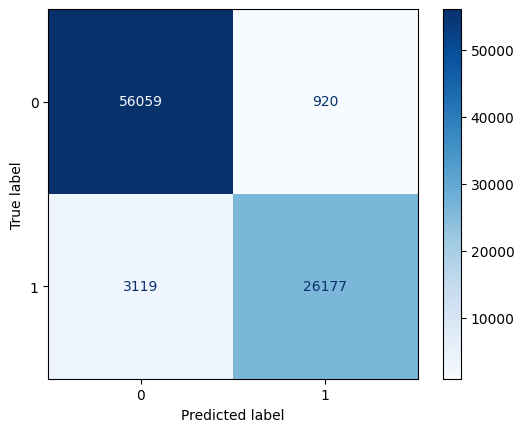

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get model predictions
y_pred = model.predict(X_test)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


In [58]:
data = {'Protocol': 17.0,
 'Flow Duration': 48.0,
 'Total Fwd Packets': 2000.0,
 'Total Backward Packets': 0.0,
 'Fwd Packets Length Total': 20.0,
 'Bwd Packets Length Total': 0.0,
 'Fwd Packet Length Max': 14.0,
 'Fwd Packet Length Min': 140.0,
 'Fwd Packet Length Mean': 140.0,
 'Fwd Packet Length Std': 0.0,
 'Bwd Packet Length Max': 0.0,
 'Bwd Packet Length Min': 0.0,
 'Bwd Packet Length Mean': 0.0,
 'Bwd Packet Length Std': 0.0,
 'Flow Bytes/s': 6.33333333,
 'Flow Packets/s': 1.66666666666,
 'Fwd IAT Mean': 48.0,
 'Fwd IAT Std': 0.0,
 'Fwd IAT Max': 48.0,
 'Fwd IAT Min': 48.0,
 'Bwd IAT Mean': 0.0,
 'Bwd IAT Std': 0.0,
 'Bwd IAT Max': 0.0,
 'Bwd IAT Min': 0.0,
 'Label': 1.0}

In [59]:
df = pd.DataFrame(data, index=[0])
model.predict(df.drop("Label", axis=1))

array([0])

In [30]:
inf_df = pd.read_csv("flow_data.csv")
inf_df.drop(["Source IP", "Destination IP"], inplace=True, axis=1)

In [31]:
model.predict(inf_df)

array([0, 1, 0, 0, 0])

In [26]:
packet = {'Protocol': 17,
 'Flow Duration': 2,
 'Total Fwd Packets': 2,
 'Total Backward Packets': 0,
 'Fwd Packets Length Total': 2944.0,
 'Bwd Packets Length Total': 0.0,
 'Fwd Packet Length Max': 1472.0,
 'Fwd Packet Length Min': 1472.0,
 'Fwd Packet Length Mean': 1472.0,
 'Fwd Packet Length Std': 0.0,
 'Bwd Packet Length Max': 0.0,
 'Bwd Packet Length Min': 0.0,
 'Bwd Packet Length Mean': 0.0,
 'Bwd Packet Length Std': 0.0,
 'Flow Bytes/s': 61333333.33333333,
 'Flow Packets/s': 41666.66666666666,
 'Flow IAT Mean': 48.0,
 'Flow IAT Std': 0.0,
 'Flow IAT Max': 48.0,
 'Flow IAT Min': 48.0,
 'Fwd IAT Total': 48.0,
 'Fwd IAT Mean': 48.0,
 'Fwd IAT Std': 0.0,
 'Fwd IAT Max': 48.0,
 'Fwd IAT Min': 48.0,
 'Bwd IAT Total': 0.0,
 'Bwd IAT Mean': 0.0,
 'Bwd IAT Std': 0.0,
 'Bwd IAT Max': 0.0,
 'Bwd IAT Min': 0.0,
 'Fwd PSH Flags': 0,
 'Bwd PSH Flags': 0,
 'Fwd URG Flags': 0,
 'Bwd URG Flags': 0,
 'Fwd Header Length': 0,
 'Bwd Header Length': 0,
 'Fwd Packets/s': 41666.668,
 'Bwd Packets/s': 0.0,
 'Packet Length Min': 1472.0,
 'Packet Length Max': 1472.0,
 'Packet Length Mean': 1472.0,
 'Packet Length Std': 0.0,
 'Packet Length Variance': 0.0,
 'FIN Flag Count': 0,
 'SYN Flag Count': 0,
 'RST Flag Count': 0,
 'PSH Flag Count': 0,
 'ACK Flag Count': 0,
 'URG Flag Count': 0,
 'CWE Flag Count': 0,
 'ECE Flag Count': 0,
 'Down/Up Ratio': 0.0,
 'Avg Packet Size': 2208.0,
 'Avg Fwd Segment Size': 1472.0,
 'Avg Bwd Segment Size': 0.0,
 'Fwd Avg Bytes/Bulk': 0,
 'Fwd Avg Packets/Bulk': 0,
 'Fwd Avg Bulk Rate': 0,
 'Bwd Avg Bytes/Bulk': 0,
 'Bwd Avg Packets/Bulk': 0,
 'Bwd Avg Bulk Rate': 0,
 'Subflow Fwd Packets': 2,
 'Subflow Fwd Bytes': 2944,
 'Subflow Bwd Packets': 0,
 'Subflow Bwd Bytes': 0,
 'Init Fwd Win Bytes': -1,
 'Init Bwd Win Bytes': -1,
 'Fwd Act Data Packets': 1,
 'Fwd Seg Size Min': 0,
 'Active Mean': 0.0,
 'Active Std': 0.0,
 'Active Max': 0.0,
 'Active Min': 0.0,
 'Idle Mean': 0.0,
 'Idle Std': 0.0,
 'Idle Max': 0.0,
 'Idle Min': 0.0}

In [27]:
packet = pd.DataFrame(packet, index=[0])
model.predict(packet)

ValueError: feature_names mismatch: ['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min'] ['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Act Data Packets', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
training data did not have the following fields: Fwd IAT Total, Fwd PSH Flags, Fwd Packets/s, Bwd Packets/s, Subflow Fwd Bytes, Subflow Bwd Bytes, Packet Length Mean, Bwd Avg Bulk Rate, Idle Max, FIN Flag Count, Active Mean, Flow IAT Min, Fwd Avg Bytes/Bulk, Packet Length Variance, Avg Packet Size, Packet Length Min, Idle Mean, Bwd Header Length, CWE Flag Count, Idle Std, PSH Flag Count, Fwd Header Length, Bwd URG Flags, Avg Bwd Segment Size, ECE Flag Count, Init Fwd Win Bytes, ACK Flag Count, Fwd URG Flags, Fwd Act Data Packets, Packet Length Std, Bwd PSH Flags, Subflow Fwd Packets, Active Std, Fwd Avg Bulk Rate, Active Min, URG Flag Count, Subflow Bwd Packets, Flow IAT Max, SYN Flag Count, Fwd Seg Size Min, RST Flag Count, Flow IAT Std, Packet Length Max, Bwd Avg Bytes/Bulk, Active Max, Init Bwd Win Bytes, Down/Up Ratio, Avg Fwd Segment Size, Fwd Avg Packets/Bulk, Bwd IAT Total, Idle Min, Flow IAT Mean, Bwd Avg Packets/Bulk